In [15]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [30]:

raw_df = pd.read_csv("./data/new_data_asia.csv")
raw_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Agriculture value added(in USD),Renewable Energy Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,41128771.0,20362329.0,20766442.0,19.841,6.208,9.0,20.98223,29.10045,30.14557,11.87949,...,3.638505e+09,5.285,68.479,74.716,100.911263,28.845509,96.636715,NaN,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842,7.344,9.0,20.98223,29.10045,30.14557,11.87949,...,4.883090e+09,17.860,58.915,65.279,100.911263,28.845509,96.636715,55.929401,2021,Afghanistan
2,38972230.0,19279930.0,19692301.0,36.051,7.113,9.0,18.48131,45.98341,53.91368,26.41834,...,5.402595e+09,17.580,59.866,65.432,100.911263,10.858440,96.636715,NaN,2020,Afghanistan
3,37769499.0,18679089.0,19090409.0,36.466,6.791,9.0,18.33941,44.51263,59.36147,24.07933,...,4.872441e+09,18.510,60.619,66.677,110.007507,28.845509,86.175522,NaN,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927,6.981,9.0,18.12015,44.39712,63.66947,23.55313,...,4.060050e+09,17.960,59.923,66.458,107.780533,9.963790,88.735519,NaN,2018,Afghanistan


# training model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from sklearn.model_selection import learning_curve

import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [18]:
training_set = raw_df

target = 'Literacy rate'

In [32]:
# drop nan row data
training_set = training_set.dropna()

In [19]:
print(training_set.columns)

Index(['Total Population', 'Female Population', 'Male Population',
       'Birth Rate', 'Death Rate', 'Compulsory Education Dur.',
       'Employment in Industry(%)', 'Employment in Agriculture(%)',
       'Female Employment in Agriculture(%)',
       'Female Employment in Industry(%)', 'Unemployment(%)', 'GDP in USD',
       'Agriculture value added(in USD)', 'Renewable Energy Consumption (%)',
       'Male life expectancy', 'Female life expectancy ',
       'School enrollment, primary', 'School enrollment, tertiary',
       'Primary completion rate', 'Literacy rate', 'Year', 'Country'],
      dtype='object')


In [26]:
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')


def plot_learning_curve(model, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training loss")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [34]:
# preprocessing data, transform label text to int
label_encoder = LabelEncoder()
X = training_set.drop(target, axis=1)  # features
X['Country'] = label_encoder.fit_transform(X['Country'])
y = training_set[target]  # target variable

# device data -> training data, testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# prprocessing data to standard data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression:
Mean Squared Error: 27.403293803258343
R-squared: 0.5566496633434844


<module 'matplotlib.pyplot' from 'c:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

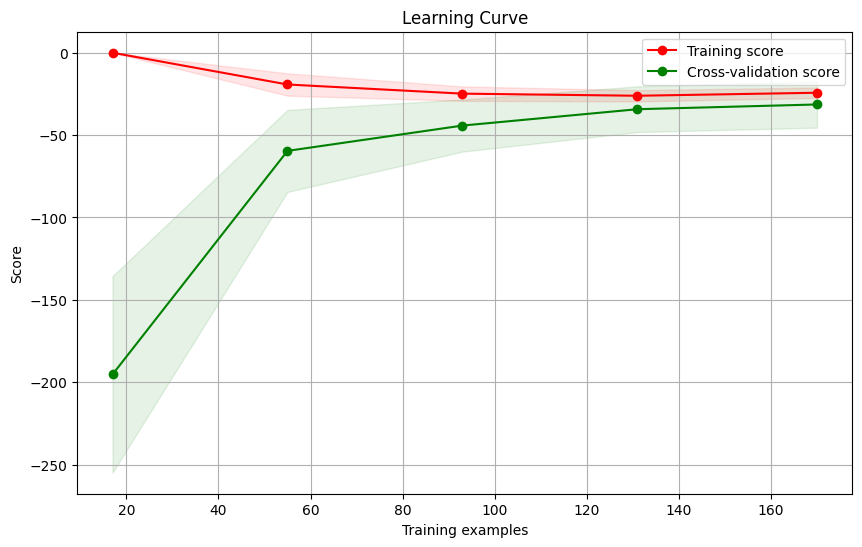

In [35]:
# Mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print('Linear Regression:')
evaluate_model(lr_predictions, y_test)

plot_learning_curve(lr_model, X_train, y_train, cv=5)